In [23]:
import pathlib
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt

import FLAGS
import dataset
import utils

In [23]:
FLAGS.DATA.INPUT_IMAGE_SIZE = (1028,1232)
FLAGS.DATA.TRAIN.IMG_PATH = r'C:\Users\Atlas\Desktop\ChinaSteel_dataset\public_training_data\public_training_data'
FLAGS.DATA.TRAIN.TABLE_PATH = pathlib.Path.cwd().parent.joinpath('Training Label','public_training_data.csv')
FLAGS.DATA.TRAIN.IS_TOY = False
FLAGS.DATA.TRAIN.IMG_SIZE = (128,128)
FLAGS.DATA.TRAIN.BATCH_SIZE = 8
FLAGS.DATA.TRAIN.ARG = True
FLAGS.DATA.TRAIN.SHUFFLE = True
FLAGS.DATA.VALID.SPLIT_RATIO = 0
FLAGS.DATA.VALID.BATCH_SIZE = 32

In [56]:
train = pd.read_csv('training_table.csv')
validation = pd.read_csv('validation_table.csv')

In [57]:
train['type'] = 'train'
validation['type'] = 'validation'
train['label_len'] = train['label'].apply(lambda x: len(x))
validation['label_len'] = validation['label'].apply(lambda x: len(x))

In [58]:
merge = train.append(validation,sort=False,ignore_index=True)

In [59]:
merge['label_len'].value_counts()

10    14607
8      2957
9       528
7         3
4         2
11        2
12        2
5         2
1         1
Name: label_len, dtype: int64

In [60]:
merge.loc[merge['label_len']==1]

,filename,label,top right x,top right y,bottom right x,bottom right y,bottom left x,bottom left y,top left x,top left y,type,label_len
11138,kJl=zQJisK79JdFLeCsDEUH_lfFIyxd,,713.2075,445.30023,714.0864,483.53113,479.1034,488.93298,478.22452,450.7021,train,1


In [61]:
merge.loc[11138,'label'] = '20425V102'

In [62]:
merge.loc[merge['label_len']==5]

,filename,label,top right x,top right y,bottom right x,bottom right y,bottom left x,bottom left y,top left x,top left y,type,label_len
8102,2wOivy29Q7dzbHjURp9LXbi48WiZOxu,3LP90,1098.7805,677.43933,1103.9852,822.5495,2.998695,871.4285,-2.205995,726.3184,train,5
12914,wsz2ZodzndujI=5jJqmOidh1UCvgkP=,2F221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,validation,5


In [63]:
merge.loc[12914,'label'] = '2F22720H'

In [64]:
merge.loc[merge['label_len']==12]

,filename,label,top right x,top right y,bottom right x,bottom right y,bottom left x,bottom left y,top left x,top left y,type,label_len
3859,dJF6VYpyHOJMzcIkemW=6nkMx4iYgxp,3LS834011A95,885.4056,454.55240,887.61096,522.41833,299.34464,546.08093,297.13922,478.21500,train,12
4831,UgBP=tGfDZgq_jV9SeF6OUCd=fwRpeVk,1W098983013A,868.5562,509.98984,868.94800,570.13960,371.15240,574.15283,370.76062,514.00305,train,12


In [70]:
merge.loc[merge['label_len']==11]

,filename,label,top right x,top right y,bottom right x,bottom right y,bottom left x,bottom left y,top left x,top left y,type,label_len
2720,2RO298IhlLUFp6yprFUvsJncsmsfWe,3LN8440E402,720.8268,449.80188,721.1695,493.91760,400.66388,496.99948,400.32117,452.88376,train,11
3975,LGS71BsGd4NS6xKetot=2nHwqB9JjbYo,30341W72930,952.2467,455.75446,951.6044,510.06778,579.96136,504.62735,580.60370,450.31403,train,11


In [71]:
merge.loc[merge['label_len']==4]

,filename,label,top right x,top right y,bottom right x,bottom right y,bottom left x,bottom left y,top left x,top left y,type,label_len
1561,UNiQPXRjE7ZcscOXbeLeCfLYEtcVlS,3042,779.173913,615.391304,779.173913,712.130435,481.347826,712.130435,481.347826,615.391304,train,4
1834,RxBRGaK1xzJQIlbcPUh9HpmCLkwbLOf3,3022,842.300500,539.516500,843.505860,620.206000,134.098890,633.323670,132.893480,552.634200,train,4


In [65]:
merge.loc[merge['label_len']==7]

,filename,label,top right x,top right y,bottom right x,bottom right y,bottom left x,bottom left y,top left x,top left y,type,label_len
176,MFSBRg9frG8PX4g76=yhXl5izkbFF=72,313014T,883.907700,446.997300,885.190900,493.397860,628.372440,502.189360,627.089230,455.788820,train,7
391,IsBxEgxKisDyyk57mlHI_nW93RrQ3p9Q,123012X,809.608696,450.173913,809.608696,504.521739,455.260870,504.521739,455.260870,450.173913,train,7
3858,UVHXTbsrGjWcMcYLXYE4QdKhRXzilT,304013F,919.391304,564.304348,919.391304,648.000000,188.956522,648.000000,188.956522,564.304348,train,7


In [66]:
merge.loc[176,'label'] = '1W7313014T'

In [67]:
merge.loc[391,'label'] = '3LH123012X'

In [69]:
merge['label'].apply(lambda x: len(x)).value_counts()

10    14609
8      2958
9       529
4         2
11        2
12        2
7         1
5         1
Name: label, dtype: int64

In [72]:
merge.to_csv('cleaned_merge_table.csv',encoding='utf8',index=False)

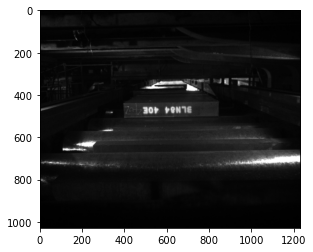

In [42]:
where = 'train'
filename = '2RO298IhlLUFp6yprFUvsJncsmsfWe'

if where == 'train':
    path = pathlib.Path(r'C:\Users\Atlas\Desktop\ChinaSteel_dataset\public\train\train_data')
else:
    path = pathlib.Path(r'C:\Users\Atlas\Desktop\ChinaSteel_dataset\public\train\validation_data')

p = plt.imread(path.joinpath(filename).with_suffix('.jpg'))
plt.imshow(p,cmap='gray')
plt.show()

In [8]:
table = pd.read_csv(FLAGS.DATA.TRAIN.TABLE_PATH)

train_data = dataset.Train(
    table = table,
    image_size = FLAGS.DATA.TRAIN.IMG_SIZE,
    batch_size = FLAGS.DATA.TRAIN.BATCH_SIZE,
    data_arg = FLAGS.DATA.TRAIN.ARG,
    shuffle = FLAGS.DATA.TRAIN.SHUFFLE)

In [17]:
table = train_data.table
(table['w']/table['h']).mean()

5.1108161195271835

<AxesSubplot:>

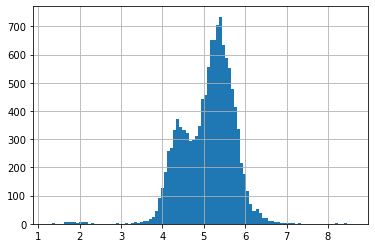

In [19]:
(table['w']/table['h']).hist(bins=100)

In [33]:
r = (table['w']/table['h'])

In [81]:
r.loc[r>3].mean()

5.12561006625717

In [77]:
(r<=3).sum()

56

In [78]:
inspect = dataset.Train(
    table = table.loc[(r>=7)].drop(['x','y','w','h'],axis=1),
    image_size = FLAGS.DATA.TRAIN.IMG_SIZE,
    batch_size = FLAGS.DATA.TRAIN.BATCH_SIZE,
    data_arg = False,
    shuffle = False)

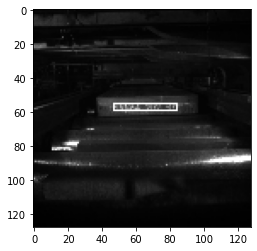

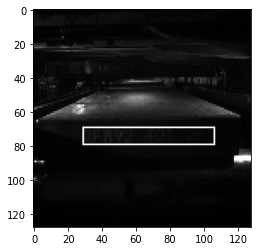

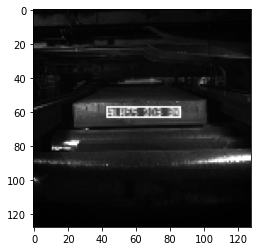

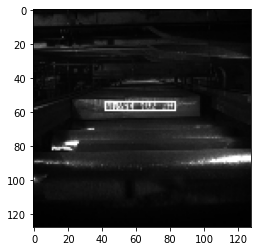

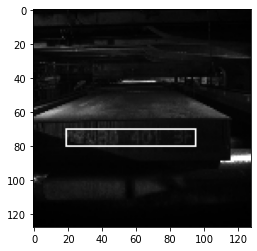

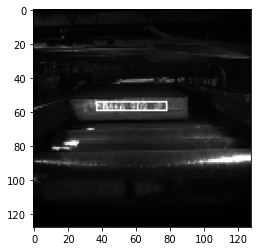

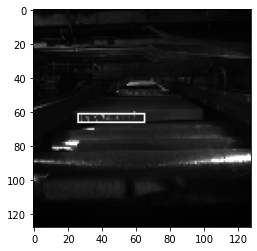

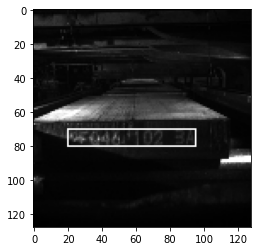

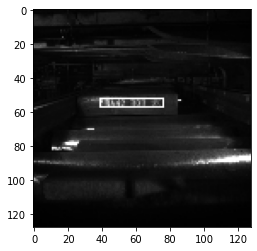

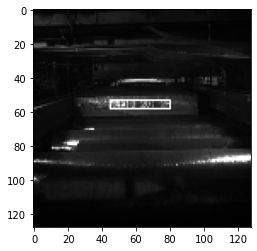

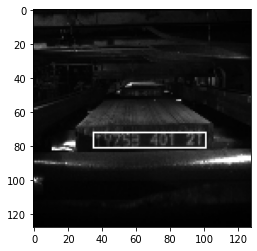

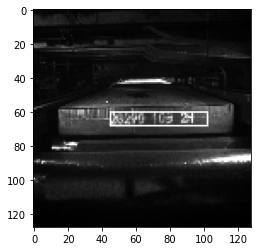

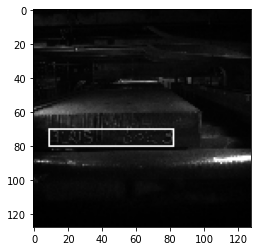

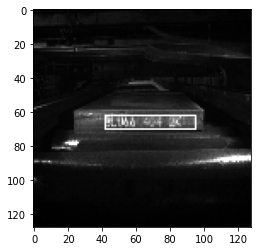

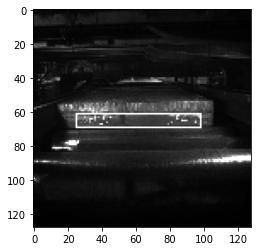

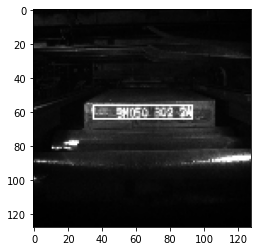

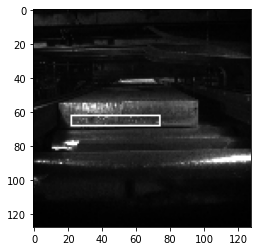

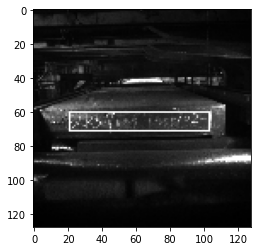

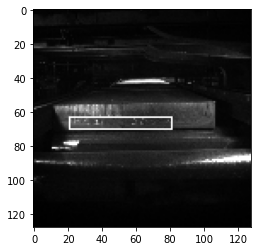

In [79]:
for imgs,bboxes in inspect:
    for img,bbox in zip(imgs,bboxes):
        utils.draw_bbox_on_image(img,bbox)